<a href="https://colab.research.google.com/github/Aatmaj-Zephyr/Machine-Learning-Lab/blob/main/Exp%202/Linear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Trojan_Detection.csv')
data.head()

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class
0,73217,10.42.0.42-121.14.255.84-49975-80-6,10.42.0.42,49975,121.14.255.84,80,6,17/07/2017 01:18:33,10743584,4,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trojan
1,72089,172.217.6.226-10.42.0.42-443-49169-17,10.42.0.42,49169,172.217.6.226,443,17,17/07/2017 10:25:25,254217,6,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trojan
2,96676,10.42.0.1-10.42.0.42-53-37749-17,10.42.0.42,37749,10.42.0.1,53,17,30/06/2017 07:16:12,1023244,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,42891,10.42.0.1-10.42.0.42-53-41352-17,10.42.0.42,41352,10.42.0.1,53,17,13/07/2017 03:48:44,286483,1,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trojan
4,169326,10.42.0.151-107.22.241.77-44353-443-6,10.42.0.151,44353,107.22.241.77,443,6,05/07/2017 10:47:35,65633087,12,...,32,322594.0,0.0,322594.0,322594.0,60306983.0,0.0,60306983.0,60306983.0,Benign


In [ ]:
# remove unnecessary columns that we dont want
columns_to_keep = [' Source IP'	,' Source Port'	,' Destination IP',	' Destination Port',' Protocol'	,' Timestamp',	' Flow', ' Duration',	' Total Fwd Packets','Class']
for column_name, column_data in data.iteritems():
  print(column_name)
  if(column_name not in columns_to_keep):
    data.drop(columns=column_name, inplace=True)
data.head()

<ipython-input-110-ad8c77daa8e6>:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column_name, column_data in data.iteritems():


Unnamed: 0
Flow ID
 Source IP
 Source Port
 Destination IP
 Destination Port
 Protocol
 Timestamp
 Flow Duration
 Total Fwd Packets
 Total Backward Packets
Total Length of Fwd Packets
 Total Length of Bwd Packets
 Fwd Packet Length Max
 Fwd Packet Length Min
 Fwd Packet Length Mean
 Fwd Packet Length Std
Bwd Packet Length Max
 Bwd Packet Length Min
 Bwd Packet Length Mean
 Bwd Packet Length Std
Flow Bytes/s
 Flow Packets/s
 Flow IAT Mean
 Flow IAT Std
 Flow IAT Max
 Flow IAT Min
Fwd IAT Total
 Fwd IAT Mean
 Fwd IAT Std
 Fwd IAT Max
 Fwd IAT Min
Bwd IAT Total
 Bwd IAT Mean
 Bwd IAT Std
 Bwd IAT Max
 Bwd IAT Min
Fwd PSH Flags
 Bwd PSH Flags
 Fwd URG Flags
 Bwd URG Flags
 Fwd Header Length
 Bwd Header Length
Fwd Packets/s
 Bwd Packets/s
 Min Packet Length
 Max Packet Length
 Packet Length Mean
 Packet Length Std
 Packet Length Variance
FIN Flag Count
 SYN Flag Count
 RST Flag Count
 PSH Flag Count
 ACK Flag Count
 URG Flag Count
 CWE Flag Count
 ECE Flag Count
 Down/Up Ratio
 Average Pack

,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Total Fwd Packets,Class
0,10.42.0.42,49975,121.14.255.84,80,6,17/07/2017 01:18:33,4,Trojan
1,10.42.0.42,49169,172.217.6.226,443,17,17/07/2017 10:25:25,6,Trojan
2,10.42.0.42,37749,10.42.0.1,53,17,30/06/2017 07:16:12,1,Benign
3,10.42.0.42,41352,10.42.0.1,53,17,13/07/2017 03:48:44,1,Trojan
4,10.42.0.151,44353,107.22.241.77,443,6,05/07/2017 10:47:35,12,Benign


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177482 entries, 0 to 177481
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0    Source IP          177482 non-null  object
 1    Source Port        177482 non-null  int64 
 2    Destination IP     177482 non-null  object
 3    Destination Port   177482 non-null  int64 
 4    Protocol           177482 non-null  int64 
 5    Timestamp          177482 non-null  object
 6    Total Fwd Packets  177482 non-null  int64 
 7   Class               177482 non-null  object
dtypes: int64(4), object(4)
memory usage: 10.8+ MB


In [ ]:
data1 = data.copy()

In [ ]:
for column_name, column_data in data1.iteritems():
    print(column_name,"---",data1[column_name].unique(),"\n")


 Source IP --- ['10.42.0.42' '10.42.0.151' '10.42.0.211' ... '172.217.7.6'
 '54.148.79.143' '173.194.208.113'] 

 Source Port --- [49975 49169 37749 ... 19341 50293  9145] 

 Destination IP --- ['121.14.255.84' '172.217.6.226' '10.42.0.1' ... '46.71.22.97'
 '162.210.168.149' '213.180.204.103'] 

 Destination Port --- [   80   443    53 ... 56819 53679 43443] 

 Protocol --- [ 6 17  0] 

 Timestamp --- ['17/07/2017 01:18:33' '17/07/2017 10:25:25' '30/06/2017 07:16:12' ...
 '02/07/2017 10:12:28' '30/06/2017 05:26:20' '02/07/2017 12:30:03'] 

 Total Fwd Packets --- [   4    6    1   12    3    2    9   26   40   20   31   17   28    5
   16    8   10    7   15   14   65   37   18   52   32   33   72   21
   43   11   30   13   23   19   27   34   25   54   92   51  156   22
   24   64   49  122  145   39   29   66  199  105   48  260  138   38
  111   36   35  104  133   47  214  124   59   61   91   50  149  136
   44   99 2954   68   87   45   70  206   75   60   79  117  188   97
   73

<ipython-input-113-fce65d2838d6>:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column_name, column_data in data1.iteritems():


protocol, packets have repeatitions


In [ ]:
data1['Class'].replace(('Trojan', 'Benign'),(1,0), inplace = True)
data1.head()

,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Total Fwd Packets,Class
0,10.42.0.42,49975,121.14.255.84,80,6,17/07/2017 01:18:33,4,1
1,10.42.0.42,49169,172.217.6.226,443,17,17/07/2017 10:25:25,6,1
2,10.42.0.42,37749,10.42.0.1,53,17,30/06/2017 07:16:12,1,0
3,10.42.0.42,41352,10.42.0.1,53,17,13/07/2017 03:48:44,1,1
4,10.42.0.151,44353,107.22.241.77,443,6,05/07/2017 10:47:35,12,0


# **One hot encoding**

In [ ]:
encoded_columns = pd.get_dummies(data1[' Protocol'])
data2 = data1.join(encoded_columns).drop(' Protocol', axis=1)
data2.head()

,Source IP,Source Port,Destination IP,Destination Port,Timestamp,Total Fwd Packets,Class,0,6,17
0,10.42.0.42,49975,121.14.255.84,80,17/07/2017 01:18:33,4,1,0,1,0
1,10.42.0.42,49169,172.217.6.226,443,17/07/2017 10:25:25,6,1,0,0,1
2,10.42.0.42,37749,10.42.0.1,53,30/06/2017 07:16:12,1,0,0,0,1
3,10.42.0.42,41352,10.42.0.1,53,13/07/2017 03:48:44,1,1,0,0,1
4,10.42.0.151,44353,107.22.241.77,443,05/07/2017 10:47:35,12,0,0,1,0


In [ ]:
data2.shape

(177482, 10)

# **Handling Outliers**

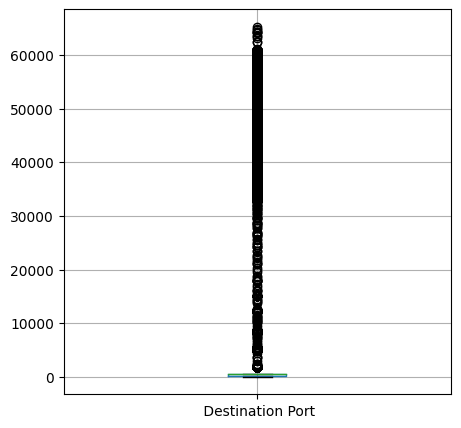

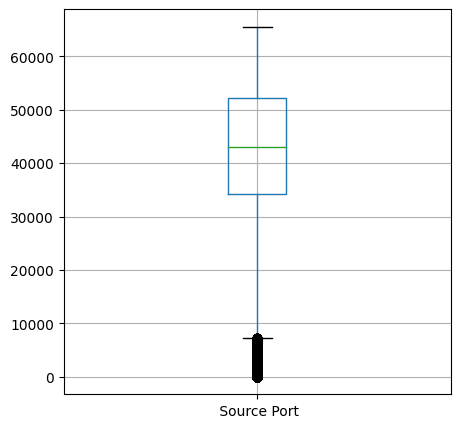

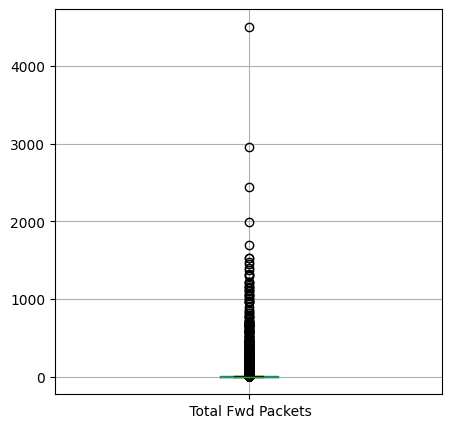

In [ ]:
#We shall visualize forwarded packets and ports in a box plot
data3 = data2.copy()
cols = [' Destination Port',' Source Port',' Total Fwd Packets']

for col in cols:
  plt.figure(figsize = (5, 5))
  data3.boxplot(column=col)

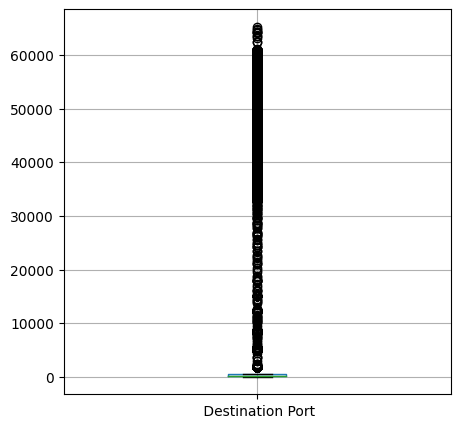

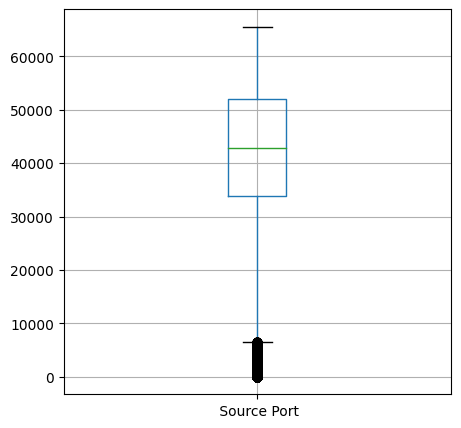

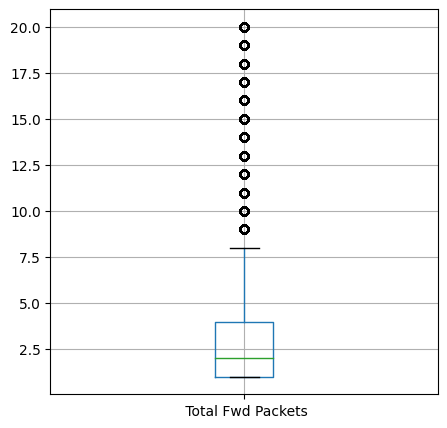

In [ ]:
upper_lim = data3[' Total Fwd Packets'].quantile(.95)
data3 = data3[data3[' Total Fwd Packets'] < upper_lim]

cols = [' Destination Port',' Source Port',' Total Fwd Packets']

for col in cols:
  plt.figure(figsize = (5, 5))
  data3.boxplot(column=col)

In [ ]:
data3.shape

(168540, 10)

In [ ]:
data3[' Total Fwd Packets'].describe()

count    168540.000000
mean          3.688709
std           3.968947
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          20.000000
Name:  Total Fwd Packets, dtype: float64

In [ ]:
data3[' Source Port'].describe()


count    168540.000000
mean      38234.098173
std       18715.674168
min           0.000000
25%       33819.000000
50%       42879.500000
75%       52047.000000
max       65530.000000
Name:  Source Port, dtype: float64

In [ ]:
data3[' Destination Port'].describe()

count    168540.000000
mean       6011.954569
std       15465.895864
min           0.000000
25%          80.000000
50%          80.000000
75%         443.000000
max       65267.000000
Name:  Destination Port, dtype: float64

In [ ]:
data4 = data3.copy()

# **Binning**

In [ ]:
import pandas as pd

labels = ['Low', 'medium', 'High']

# Define bin edges based on unique values in the column
source_port_bins = [data4[' Source Port'].min(), 42879,  52047, data4[' Source Port'].max()]
destination_port_bins = [data4[' Destination Port'].min(), 80, 443, data4[' Destination Port'].max()]

# Binning 'Source Port' without dropping duplicates
data4[' Source Port'] = pd.cut(data4[' Source Port'], bins=source_port_bins, labels=labels, include_lowest=True)
data4[' Destination Port'] = pd.cut(data4[' Destination Port'], bins=destination_port_bins, labels=labels, include_lowest=True)


In [ ]:
data4.head()

,Source IP,Source Port,Destination IP,Destination Port,Timestamp,Total Fwd Packets,Class,0,6,17
0,10.42.0.42,medium,121.14.255.84,Low,17/07/2017 01:18:33,4,1,0,1,0
1,10.42.0.42,medium,172.217.6.226,medium,17/07/2017 10:25:25,6,1,0,0,1
2,10.42.0.42,Low,10.42.0.1,Low,30/06/2017 07:16:12,1,0,0,0,1
3,10.42.0.42,Low,10.42.0.1,Low,13/07/2017 03:48:44,1,1,0,0,1
4,10.42.0.151,medium,107.22.241.77,medium,05/07/2017 10:47:35,12,0,0,1,0


In [ ]:
data4[' Source Port'].value_counts()

Low       84270
medium    42140
High      42130
Name:  Source Port, dtype: int64

# **Imputation**

In [ ]:
data5 = data4.copy()

In [ ]:
data5['imputation'] = np.random.randint(1, 1000, data5.shape[0])

In [ ]:
data5.head()

,Source IP,Source Port,Destination IP,Destination Port,Timestamp,Total Fwd Packets,Class,0,6,17,imputation
0,10.42.0.42,medium,121.14.255.84,Low,17/07/2017 01:18:33,4,1,0,1,0,575
1,10.42.0.42,medium,172.217.6.226,medium,17/07/2017 10:25:25,6,1,0,0,1,877
2,10.42.0.42,Low,10.42.0.1,Low,30/06/2017 07:16:12,1,0,0,0,1,220
3,10.42.0.42,Low,10.42.0.1,Low,13/07/2017 03:48:44,1,1,0,0,1,859
4,10.42.0.151,medium,107.22.241.77,medium,05/07/2017 10:47:35,12,0,0,1,0,709


In [ ]:
RANGE = np.arange(50,80,1)

In [ ]:
data5['imputation'].replace(RANGE,np.nan, inplace = True)

In [ ]:
data5['imputation'].value_counts()

201.0    206
509.0    206
748.0    203
43.0     203
827.0    202
        ... 
615.0    138
345.0    138
256.0    136
86.0     136
493.0    134
Name: imputation, Length: 969, dtype: int64

In [ ]:
data5.isnull().sum()

 Source IP               0
 Source Port             0
 Destination IP          0
 Destination Port        0
 Timestamp               0
 Total Fwd Packets       0
Class                    0
0                        0
6                        0
17                       0
imputation            4989
dtype: int64

In [ ]:
data5['imputation'] = data5['imputation'].fillna(data5['imputation'].median())

In [ ]:
data5.isnull().sum()

 Source IP            0
 Source Port          0
 Destination IP       0
 Destination Port     0
 Timestamp            0
 Total Fwd Packets    0
Class                 0
0                     0
6                     0
17                    0
imputation            0
dtype: int64

# **Normalization**

In [ ]:
data6 = data5.copy()

In [ ]:
data6[' Total Fwd Packets'][:7]

0     4
1     6
2     1
3     1
4    12
5     1
6     3
Name:  Total Fwd Packets, dtype: int64

In [ ]:
data6['normalized'] = (data6[' Total Fwd Packets'] - data6[' Total Fwd Packets'].min()) / (data6[' Total Fwd Packets'].max() - data6[' Total Fwd Packets'].min())

In [ ]:
data6['normalized'][:7]

0    0.157895
1    0.263158
2    0.000000
3    0.000000
4    0.578947
5    0.000000
6    0.105263
Name: normalized, dtype: float64

# **Standardization**

In [ ]:
data7 = data6.copy()

In [ ]:
data7['imputation'][:7]

0    575.0
1    877.0
2    220.0
3    859.0
4    709.0
5    771.0
6    283.0
Name: imputation, dtype: float64

In [ ]:
data7['standardized'] = (data7['imputation'] - data7['imputation'].mean()) / data7['imputation'].std()

In [ ]:
data7['standardized'][:7]

0    0.221645
1    1.309004
2   -1.056541
3    1.244194
4    0.704116
5    0.927348
6   -0.829708
Name: standardized, dtype: float64

Handling others


In [ ]:
data6.head()

,Source IP,Source Port,Destination IP,Destination Port,Timestamp,Total Fwd Packets,Class,0,6,17,imputation,normalized
0,10.42.0.42,medium,121.14.255.84,Low,17/07/2017 01:18:33,4,1,0,1,0,575.0,0.157895
1,10.42.0.42,medium,172.217.6.226,medium,17/07/2017 10:25:25,6,1,0,0,1,877.0,0.263158
2,10.42.0.42,Low,10.42.0.1,Low,30/06/2017 07:16:12,1,0,0,0,1,220.0,0.000000
3,10.42.0.42,Low,10.42.0.1,Low,13/07/2017 03:48:44,1,1,0,0,1,859.0,0.000000
4,10.42.0.151,medium,107.22.241.77,medium,05/07/2017 10:47:35,12,0,0,1,0,709.0,0.578947


In [ ]:
# timestamp
data6[' Timestamp'] = pd.to_datetime(data6[' Timestamp'], format='%d/%m/%Y %H:%M:%S')
data6['Year'] = data6[' Timestamp'].dt.year
data6['Month'] = data6[' Timestamp'].dt.month
data6['Day'] = data6[' Timestamp'].dt.day
data6['Hour'] = data6[' Timestamp'].dt.hour
data6['Minute'] = data6[' Timestamp'].dt.minute
data6['Second'] = data6[' Timestamp'].dt.second



In [ ]:
data6

,Source IP,Source Port,Destination IP,Destination Port,Timestamp,Total Fwd Packets,Class,0,6,17,imputation,normalized,Year,Month,Day,Hour,Minute,Second
0,10.42.0.42,medium,121.14.255.84,Low,2017-07-17 01:18:33,4,1,0,1,0,575.0,0.157895,2017,7,17,1,18,33
1,10.42.0.42,medium,172.217.6.226,medium,2017-07-17 10:25:25,6,1,0,0,1,877.0,0.263158,2017,7,17,10,25,25
2,10.42.0.42,Low,10.42.0.1,Low,2017-06-30 07:16:12,1,0,0,0,1,220.0,0.000000,2017,6,30,7,16,12
3,10.42.0.42,Low,10.42.0.1,Low,2017-07-13 03:48:44,1,1,0,0,1,859.0,0.000000,2017,7,13,3,48,44
4,10.42.0.151,medium,107.22.241.77,medium,2017-07-05 10:47:35,12,0,0,1,0,709.0,0.578947,2017,7,5,10,47,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177477,10.42.0.42,High,64.71.142.96,Low,2017-07-13 03:50:57,2,1,0,1,0,779.0,0.052632,2017,7,13,3,50,57
177478,10.42.0.42,Low,54.192.36.60,Low,2017-07-17 03:36:20,2,1,0,1,0,454.0,0.052632,2017,7,17,3,36,20
177479,10.42.0.42,medium,172.217.9.232,medium,2017-07-14 03:45:27,9,1,0,1,0,696.0,0.421053,2017,7,14,3,45,27
177480,10.42.0.211,Low,10.42.0.1,Low,2017-07-11 10:16:27,1,1,0,0,1,82.0,0.000000,2017,7,11,10,16,27


In [ ]:
#log handling
data6['log_column'] = np.log(data[' Total Fwd Packets'])
data6.head()

,Source IP,Source Port,Destination IP,Destination Port,Timestamp,Total Fwd Packets,Class,0,6,17,imputation,normalized,Year,Month,Day,Hour,Minute,Second,log_column
0,10.42.0.42,medium,121.14.255.84,Low,2017-07-17 01:18:33,4,1,0,1,0,575.0,0.157895,2017,7,17,1,18,33,1.386294
1,10.42.0.42,medium,172.217.6.226,medium,2017-07-17 10:25:25,6,1,0,0,1,877.0,0.263158,2017,7,17,10,25,25,1.791759
2,10.42.0.42,Low,10.42.0.1,Low,2017-06-30 07:16:12,1,0,0,0,1,220.0,0.000000,2017,6,30,7,16,12,0.000000
3,10.42.0.42,Low,10.42.0.1,Low,2017-07-13 03:48:44,1,1,0,0,1,859.0,0.000000,2017,7,13,3,48,44,0.000000
4,10.42.0.151,medium,107.22.241.77,medium,2017-07-05 10:47:35,12,0,0,1,0,709.0,0.578947,2017,7,5,10,47,35,2.484907


In [ ]:
#ip handel
data6[' Source IP'] = data6[' Source IP'].str.split('.')
data6[[' Source IP Octet1', ' Source IP Octet2', ' Source IP Octet3', ' Source IP Octet4']] = data6[' Source IP'].apply(pd.Series)


In [ ]:
#ip handel
data6[' Destination IP'] = data6[' Destination IP'].str.split('.')
data6[[' Destination IP Octet1', ' Destination IP Octet2', ' Destination IP Octet3', ' Destination IP Octet4']] = data6[' Destination IP'].apply(pd.Series)


In [ ]:
data6

,Source IP,Source Port,Destination IP,Destination Port,Timestamp,Total Fwd Packets,Class,0,6,17,...,Second,log_column,Source IP Octet1,Source IP Octet2,Source IP Octet3,Source IP Octet4,Destination IP Octet1,Destination IP Octet2,Destination IP Octet3,Destination IP Octet4
0,"[10, 42, 0, 42]",medium,"[121, 14, 255, 84]",Low,2017-07-17 01:18:33,4,1,0,1,0,...,33,1.386294,10,42,0,42,121,14,255,84
1,"[10, 42, 0, 42]",medium,"[172, 217, 6, 226]",medium,2017-07-17 10:25:25,6,1,0,0,1,...,25,1.791759,10,42,0,42,172,217,6,226
2,"[10, 42, 0, 42]",Low,"[10, 42, 0, 1]",Low,2017-06-30 07:16:12,1,0,0,0,1,...,12,0.000000,10,42,0,42,10,42,0,1
3,"[10, 42, 0, 42]",Low,"[10, 42, 0, 1]",Low,2017-07-13 03:48:44,1,1,0,0,1,...,44,0.000000,10,42,0,42,10,42,0,1
4,"[10, 42, 0, 151]",medium,"[107, 22, 241, 77]",medium,2017-07-05 10:47:35,12,0,0,1,0,...,35,2.484907,10,42,0,151,107,22,241,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177477,"[10, 42, 0, 42]",High,"[64, 71, 142, 96]",Low,2017-07-13 03:50:57,2,1,0,1,0,...,57,0.693147,10,42,0,42,64,71,142,96
177478,"[10, 42, 0, 42]",Low,"[54, 192, 36, 60]",Low,2017-07-17 03:36:20,2,1,0,1,0,...,20,0.693147,10,42,0,42,54,192,36,60
177479,"[10, 42, 0, 42]",medium,"[172, 217, 9, 232]",medium,2017-07-14 03:45:27,9,1,0,1,0,...,27,2.197225,10,42,0,42,172,217,9,232
177480,"[10, 42, 0, 211]",Low,"[10, 42, 0, 1]",Low,2017-07-11 10:16:27,1,1,0,0,1,...,27,0.000000,10,42,0,211,10,42,0,1


In [ ]:
for column_name in [' Destination IP Octet1', ' Destination IP Octet2', ' Destination IP Octet3', ' Destination IP Octet4',' Source IP Octet1', ' Source IP Octet2', ' Source IP Octet3', ' Source IP Octet4']:
    print(column_name,"---",data6[column_name].unique(),"\n")

 Destination IP Octet1 --- ['121' '172' '10' '107' '74' '66' '180' '216' '202' '208' '104' '205' '98'
 '157' '54' '221' '52' '203' '31' '23' '42' '192' '123' '106' '8' '76'
 '119' '113' '59' '72' '151' '125' '103' '140' '111' '219' '114' '198'
 '175' '64' '220' '77' '108' '132' '162' '61' '174' '209' '173' '87' '217'
 '239' '169' '36' '50' '182' '63' '27' '95' '118' '115' '34' '58' '47'
 '117' '120' '183' '122' '156' '14' '163' '37' '13' '131' '110' '40' '69'
 '112' '101' '65' '144' '68' '35' '224' '199' '184' '153' '211' '88' '96'
 '124' '5' '171' '204' '158' '152' '91' '116' '93' '90' '38' '129' '0'
 '206' '150' '176' '43' '165' '1' '75' '195' '186' '130' '139' '255' '137'
 '213' '24' '45' '191' '67' '85' '189' '138' '81' '177' '41' '89' '210'
 '109' '83' '201' '39' '181' '94' '97' '70' '178' '159' '141' '99' '73'
 '82' '92' '188' '79' '84' '197' '49' '179' '46' '168' '212' '190' '187'
 '193' '71' '128' '62' '2' '218' '86' '80' '100' '196' '207'] 

 Destination IP Octet2 --- ['14' '2

No duplicate values to remove.

In [ ]:
# Convert IP address columns to numeric type
ip_columns = [' Destination IP Octet1', ' Destination IP Octet2', ' Destination IP Octet3', ' Destination IP Octet4', ' Source IP Octet1', ' Source IP Octet2', ' Source IP Octet3', ' Source IP Octet4']
data6[ip_columns] = data6[ip_columns].apply(pd.to_numeric, errors='coerce')

# Normalize the numeric columns
for column_name in ip_columns:
    data6[column_name] = (data6[column_name] - data6[column_name].min()) / (data6[column_name].max() - data6[column_name].min())

data6.head()


,Source IP,Source Port,Destination IP,Destination Port,Timestamp,Total Fwd Packets,Class,0,6,17,...,Second,log_column,Source IP Octet1,Source IP Octet2,Source IP Octet3,Source IP Octet4,Destination IP Octet1,Destination IP Octet2,Destination IP Octet3,Destination IP Octet4
0,"[10, 42, 0, 42]",medium,"[121, 14, 255, 84]",Low,2017-07-17 01:18:33,4,1,0,1,0,...,33,1.386294,0.045249,0.164706,0.0,0.164706,0.474510,0.054902,1.000000,0.329412
1,"[10, 42, 0, 42]",medium,"[172, 217, 6, 226]",medium,2017-07-17 10:25:25,6,1,0,0,1,...,25,1.791759,0.045249,0.164706,0.0,0.164706,0.674510,0.850980,0.023529,0.886275
2,"[10, 42, 0, 42]",Low,"[10, 42, 0, 1]",Low,2017-06-30 07:16:12,1,0,0,0,1,...,12,0.000000,0.045249,0.164706,0.0,0.164706,0.039216,0.164706,0.000000,0.003922
3,"[10, 42, 0, 42]",Low,"[10, 42, 0, 1]",Low,2017-07-13 03:48:44,1,1,0,0,1,...,44,0.000000,0.045249,0.164706,0.0,0.164706,0.039216,0.164706,0.000000,0.003922
4,"[10, 42, 0, 151]",medium,"[107, 22, 241, 77]",medium,2017-07-05 10:47:35,12,0,0,1,0,...,35,2.484907,0.045249,0.164706,0.0,0.592157,0.419608,0.086275,0.945098,0.301961
